<a href="https://colab.research.google.com/github/tuncayyaylali/my_projects/blob/main/Final_Project_Rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GELİR TAHMİNİ**

---

Malcolm GLADWELL' in Outliers adlı kitabı, elde ettikleri başarılar ve hayat hikayetleriyle diğer insanlardan farklılaşan kişiler üzerine yapılmış bir çalışmadır. Çalışma kapsamında başarılı kişilerin, kişisel özelliklerinin yanı sıra ekonomik, demografik, sosyolojik, kültürel, fiziksel vb. dış çevre özeliklerinin de dikkate alınması gerektiği vurgulanarak daha geniş bir perspektiften konu ele alınmıştır ([Outliers, GLADWELL M.](https://www.gladwellbooks.com/titles/malcolm-gladwell/outliers/9780316040341/)). 

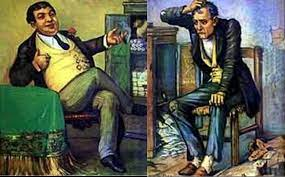

Yukarıda bahsi geçen çalışmadan esinlenerek University of California Center of Machine Learning and Intelligent Systems' in internet sitesinde yer alan "Adult" adlı veri seti kullanılarak demografik, sosyolojik, kültürel vb. özelliklerle örneklemin gelir düzeylerinin 50K' danbüyük olup olmadığı tahmin edilmeye çalışılmıştır ([Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult)). 

---

**VERİ SETİ AÇIKLAMASI**\
Veri seti, 1994 Nüfus Sayım Sonuçları veri tabanından Barry Becker tarafından yapılmıştır. Bazı koşullar kullanılarak bir dizi kayıt veri setindençıkarılmıştır.

**Değişkenler**
- age: Yaş
- workclass: Çalışma Şekli (*Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked*)
- fnlwgt: Benzer sosyo-ekonomik özelliklere sahip her bir personanın toplam eleman sayısıdır.
- education: Eğitim Durumu (*Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool*)
- education_num: Eğitim Süresi
- marital_status: Medeni Durumu (*Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse*)
- occupation: Meslek (*Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces*)
- relationship: İlişki Durumu (*Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried*)
- race: Irk (*White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black*)
- sex: Cinsiyet (*Female, Male*)
- capital_gain: Yatırım Kazancı
- capital_loss: Yatırım Kaybı
- hours_per_week: Haftalık Çalışma Süresi
- native-country: Oirijin Ülke (*United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands*)
- income: Gelir (*>50K veya <=50K*)

**Kütüphanelerin Yüklenmesi**

In [ ]:
# Kütüphanelerin Yüklenmesi
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve

     |████████████████████████████████| 76.1 MB 49 kB/s 


**Veri Setinin Yüklenmesi**

In [ ]:
# Veri Setinin Yüklenmesi
col_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", \
             "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country",\
             "income"]
df_train = pd.read_csv("/content/drive/MyDrive/Kişisel Dosyalar/adult_train.csv", header=None, index_col=False, names=col_names)
df_train["first_situation"]="train"
df_test = pd.read_csv("/content/drive/MyDrive/Kişisel Dosyalar/adult_test.csv", header=None, skiprows=1, index_col=False, names=col_names)
df_test["first_situation"]="test"

**Veri Setinin Birleştirilmesi**\
Daha sonra gerçekleştirilecek encoding işlemlerinin tüm veri setinde uygulanması maksadıyla train ve test veri seti başlangıçta birleştirilmiştir.

In [ ]:
# Veri Setinin Birleştirilmesi 
df = df_train.append(df_test).reset_index(drop=True)

**Veri Setine Genel Bakış**\
Veri setinde bir bağımlı değişken ve 15 bağımsız değişken olmak üzere toplam 16 değişken bulunmaktadır. Bu değişkenlerin 6' sı sayısal tipte geriye kalan 10' u kategorik tipte değişken görünümündedir. Veri setinde toplam 48.842 kayıt bulunmaktadır. Eksik değerin olmadığı bir görünümdedir.

In [ ]:
# Veri Setine Genel Bakış


def check_df(dataframe, head=5):
    print(f"\nVERİ SETİNİN BOYUTU")
    print(dataframe.shape)
    print(f"\nDEĞİŞKEN TİPLERİ")
    print(dataframe.dtypes)
    print(f"\nİLK 5 DEĞER")
    print(dataframe.head(head))
    print(f"\nSON 5 DEĞER")
    print(dataframe.tail(head))
    print(f"\nEKSİK DEĞERLER")
    print(dataframe.isnull().sum())
    print(f"\nBETİMLEYİCİ İSTATİSTİK")
    print(dataframe.quantile([0, 0.01, 0.50, 0.95, 0.99, 1]).T)
    

check_df(df)


VERİ SETİNİN BOYUTU
(48842, 16)

DEĞİŞKEN TİPLERİ
age                 int64
workclass          object
fnlwgt              int64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
first_situation    object
dtype: object

İLK 5 DEĞER
   age          workclass  fnlwgt  ...  native_country  income first_situation
0   39          State-gov   77516  ...   United-States   <=50K           train
1   50   Self-emp-not-inc   83311  ...   United-States   <=50K           train
2   38            Private  215646  ...   United-States   <=50K           train
3   53            Private  234721  ...   United-States   <=50K           train
4   28            Private  338409  ...            Cuba   <=50K           train

[5 rows x 16 columns]

SON 5 DE

**Keşifçi Veri Analizi (EDA)**\
Veri setinde workclass, occuptaion ve native_country değişkenlerinden değerlerde ? ifadesinin yer aldığı görülmektedir. Ayrıca education ve education_num değişkenlerine ait değerlerin sınıflarındaki frekans ve oranların birebir aynı olduğu görülmektedir.

In [ ]:
# EDA


def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")


for col in df.columns:
    cat_summary(df, col)

     age     Ratio
36  1348  2.759920
35  1337  2.737398
33  1335  2.733303
23  1329  2.721019
31  1325  2.712829
..   ...       ...
88     6  0.012285
85     5  0.010237
87     3  0.006142
89     2  0.004095
86     1  0.002047

[74 rows x 2 columns]
##########################################
                   workclass      Ratio
 Private               33906  69.419762
 Self-emp-not-inc       3862   7.907129
 Local-gov              3136   6.420703
 ?                      2799   5.730724
 State-gov              1981   4.055935
 Self-emp-inc           1695   3.470374
 Federal-gov            1432   2.931903
 Without-pay              21   0.042996
 Never-worked             10   0.020474
##########################################
        fnlwgt     Ratio
203488      21  0.042996
120277      19  0.038901
190290      19  0.038901
125892      18  0.036854
126569      18  0.036854
...        ...       ...
286983       1  0.002047
185942       1  0.002047
234220       1  0.002047
214706       

**Özellik Mühendisliği**\
Gelirin 50K' dan büyük olmasının yaş değişkeniyle yakından ilişkili olabileceği düşünülerek age değişkeninden young, mature ve senior sınıfında new_age_cat değişkeni oluşturulmuştur.

Geliri 50K' dan büyük olanların kişinin yalnız yaşayıp yaşamadığıyla yakından ilişkili olabileceği düşünülerek relationship değişkeninden boolen türünde new_is_alone değişkeni oluşturulmuştur.

Geliri 50K' dan büyük olanların orijinlerinin belirli bir kıtadan olabileceği düşünülerek native_country değişkeninden North America, South America, Europe ve Asia sınıfında new_continent değişkeni oluşturulmuştur.  native_country değişkenindeki boş değerler için new_continent değişkeninde Unknown sınıfı oluşturulmuştur.

Geliri 50K' dan büyük olanların çalışma sektörlerinin belirli bir grupta olabileceği düşünülerek workclass değişkeninden Serbest, Kamu ve Ucretsiz sınıfında new_work_class değişkeni oluşturulmuştur.  workclass değişkenindeki boş değerler için new_work_class değişkeninde Unknown sınıfı oluşturulmuştur.

Keşifçi veri analizi bulguları doğrultusunda veri setinde workclass, occupation ve native_country değişkenlerindeki ? değerleri silinmiştir. 

Keşifçi veri analizi bulguları doğrultusunda education ve education_num değişkenlerine ait değerlerin sınıflarındaki frekans ve oranların birebir aynı olması sebebiyle education değişkeni veri setinden silinmiştir.

Income değişkeninde ">50K" ve ">50K." şeklindeki string değerlerin aynı değeri temsil ettiği, "<=50K" ve "<=50K." şeklindeki string değerlerin de yine aynı değeri temsil ettiği belirlenmiş ve ">50K" ve ">50K." string ifadeler 1 değeriyle, "<=50K" ve "<=50K." 0 değeriyle değiştirilmiştir.

In [ ]:
# age Değişkeni Üzerinden Gruplandırma Yapılarak Yeni Değişken Üretilmesi
df.loc[(df['age'] < 18), 'new_age_cat'] = 'young'
df.loc[((df['age'] >= 18) & (df['age'] < 56)), 'new_age_cat'] = 'mature'
df.loc[(df['age'] >= 56), 'new_age_cat'] = 'senior'

In [ ]:
# relationship Değişkeni Üzerinden Gruplandırma Yapılarak Yeni Değişken Üretilmesi
df["new_is_alone"] = df["relationship"].apply(lambda x: "Yes" if x.strip() == "Not-in-family" else "No")

In [ ]:
# native_country Değişkeni Üzerinden Gruplandırma Yapılarak Yeni Değişken Üretilmesi
north_america_countries = ["Jamaica", "Mexico", "Cuba", "Canada", "United-States", "Puerto-Rico", "Haiti", "Dominican-Republic", \
                           "El-Salvador", "Nicaragua", "Guatemala", "Honduras", "Trinadad&Tobago", "Outlying-US(Guam-USVI-etc)"]
south_america_countries = ["Ecuador", "Colombia", "Peru"]
europe_countries = ["England", "France", "Germany", "Greece", "Holand-Netherlands", "Hungary", "Ireland", "Italy", "Poland", "Portugal", "Scotland", "Yugoslavia"]
asia_countries = ["Iran", "Japan", "India", "Philippines", "Taiwan", "Thailand", "Vietnam", "China", "South", "Laos", "Cambodia", "Hong"]

for i in north_america_countries:
  df.loc[df["native_country"].str.contains(i), "new_continent"] = "North America" 

for i in south_america_countries:
  df.loc[df["native_country"].str.contains(i), "new_continent"] = "South America" 

for i in europe_countries:
  df.loc[df["native_country"].str.contains(i), "new_continent"] = "Europe" 

for i in asia_countries:
  df.loc[df["native_country"].str.contains(i), "new_continent"] = "Asia"

df["new_continent"].fillna(value="Unknown", axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [ ]:
# workclass Değişkeni Üzerinden Gruplandırma Yapılarak Yeni Değişken Üretilmesi
df.loc[df["workclass"].str.contains("Private"), "new_work_class"] = "Serbest"
df.loc[df["workclass"].str.contains("Self-emp-not-inc"), "new_work_class"] = "Serbest"
df.loc[df["workclass"].str.contains("Self-emp-inc"), "new_work_class"] = "Serbest"
df.loc[df["workclass"].str.contains("Local-gov"), "new_work_class"] = "Kamu"
df.loc[df["workclass"].str.contains("State-gov"), "new_work_class"] = "Kamu"
df.loc[df["workclass"].str.contains("Federal-gov"), "new_work_class"] = "Kamu"
df.loc[df["workclass"].str.contains("Without-pay"), "new_work_class"] = "Ucretsiz"
df.loc[df["workclass"].str.contains("Never-worked"), "new_work_class"] = "Ucretsiz"
df["new_work_class"].fillna(value="Unknown", axis=0, inplace=True)

In [ ]:
# Değişkenlerde Yer Alan Soru İşareti Değerlerinin Silinmesi
for col in ["workclass", "occupation", "native_country"]:
    df[col] = df[col].str.strip().map(lambda x: np.nan if x=="?" else x)

In [ ]:
# education Değişkeninin Silinmesi
df.drop("education", axis=1, inplace=True)

In [ ]:
# income Değişkeninin Standartlaştırılması
df["income"] = df["income"].apply(lambda x: 1 if ">50K" in x else 0)

**Değişken Tiplerinin Belirlenmesi**

In [ ]:
# Değişken Tiplerinin Belirlenmesi


def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)} {cat_cols}')
    print(f'num_cols: {len(num_cols)} {num_cols}')
    print(f'cat_but_car: {len(cat_but_car)} {cat_but_car}')
    print(f'num_but_cat: {len(num_but_cat)} {num_but_cat}')
    return cat_cols, num_cols, cat_but_car, num_but_cat


cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df, 10, 50)

Observations: 48842
Variables: 19
cat_cols: 13 ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'first_situation', 'new_age_cat', 'new_is_alone', 'new_continent', 'new_work_class', 'income']
num_cols: 6 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
cat_but_car: 0 []
num_but_cat: 1 ['income']


**Kategorik Değişken Analizi**

                  workclass      Ratio
Private               33906  69.419762
Self-emp-not-inc       3862   7.907129
Local-gov              3136   6.420703
State-gov              1981   4.055935
Self-emp-inc           1695   3.470374
Federal-gov            1432   2.931903
Without-pay              21   0.042996
Never-worked             10   0.020474


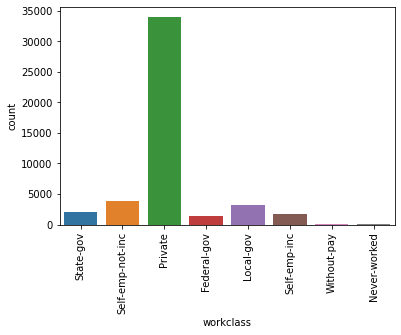

                        marital_status      Ratio
 Married-civ-spouse              22379  45.819172
 Never-married                   16117  32.998239
 Divorced                         6633  13.580525
 Separated                        1530   3.132550
 Widowed                          1518   3.107981
 Married-spouse-absent             628   1.285779
 Married-AF-spouse                  37   0.075754


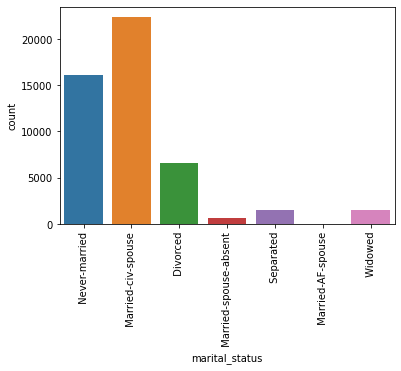

                   occupation      Ratio
Prof-specialty           6172  12.636665
Craft-repair             6112  12.513820
Exec-managerial          6086  12.460587
Adm-clerical             5611  11.488064
Sales                    5504  11.268990
Other-service            4923  10.079440
Machine-op-inspct        3022   6.187298
Transport-moving         2355   4.821670
Handlers-cleaners        2072   4.242251
Farming-fishing          1490   3.050653
Tech-support             1446   2.960567
Protective-serv           983   2.012612
Priv-house-serv           242   0.495475
Armed-Forces               15   0.030711


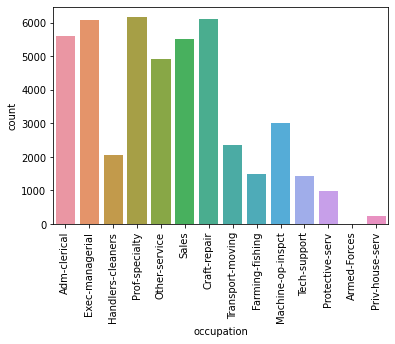

                 relationship      Ratio
 Husband                19716  40.366897
 Not-in-family          12583  25.762663
 Own-child               7581  15.521477
 Unmarried               5125  10.493018
 Wife                    2331   4.772532
 Other-relative          1506   3.083412


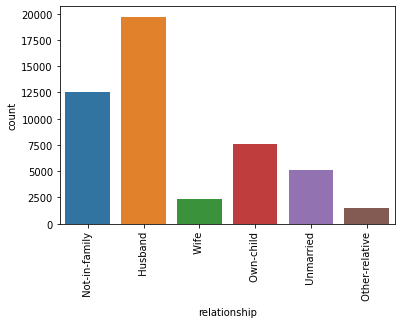

                      race      Ratio
 White               41762  85.504279
 Black                4685   9.592154
 Asian-Pac-Islander   1519   3.110028
 Amer-Indian-Eskimo    470   0.962287
 Other                 406   0.831252


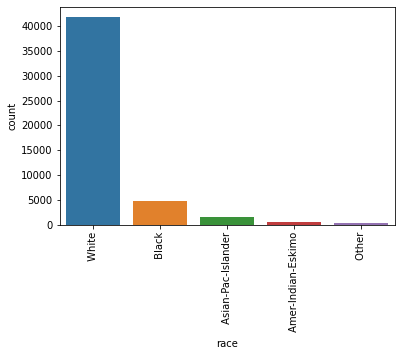

           sex      Ratio
 Male    32650  66.848204
 Female  16192  33.151796


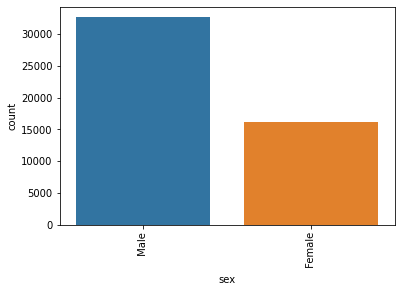

                            native_country      Ratio
United-States                        43832  89.742435
Mexico                                 951   1.947095
Philippines                            295   0.603988
Germany                                206   0.421768
Puerto-Rico                            184   0.376725
Canada                                 182   0.372630
El-Salvador                            155   0.317350
India                                  151   0.309160
Cuba                                   138   0.282544
England                                127   0.260022
China                                  122   0.249785
South                                  115   0.235453
Jamaica                                106   0.217026
Italy                                  105   0.214979
Dominican-Republic                     103   0.210884
Japan                                   92   0.188362
Guatemala                               88   0.180173
Poland                      

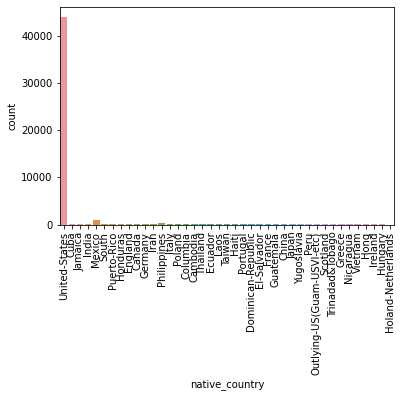

       first_situation      Ratio
train            32561  66.665984
test             16281  33.334016


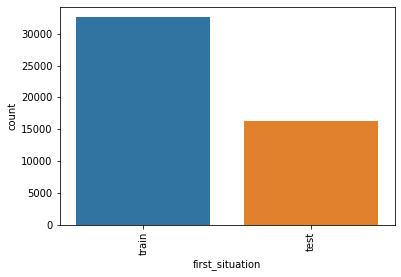

        new_age_cat      Ratio
mature        41999  85.989517
senior         6248  12.792269
young           595   1.218214


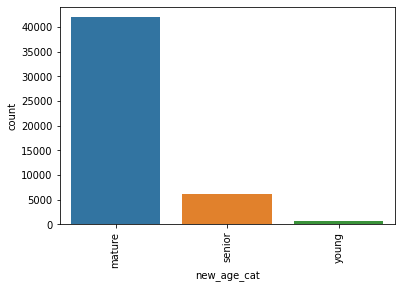

     new_is_alone      Ratio
No          36259  74.237337
Yes         12583  25.762663


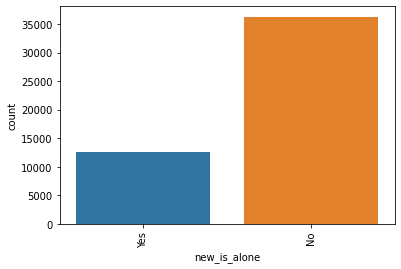

               new_continent      Ratio
North America          45910  93.996970
Asia                    1096   2.243970
Unknown                  965   1.975759
Europe                   780   1.596986
South America             91   0.186315


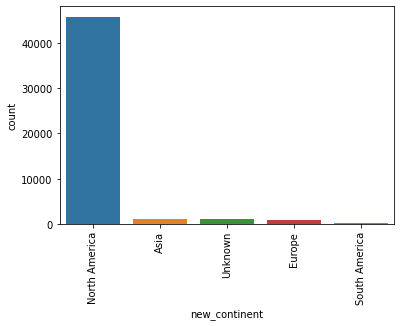

          new_work_class      Ratio
Serbest            39463  80.797265
Kamu                6549  13.408542
Unknown             2799   5.730724
Ucretsiz              31   0.063470


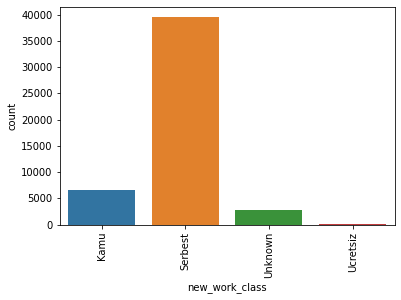

   income      Ratio
0   37155  76.071823
1   11687  23.928177


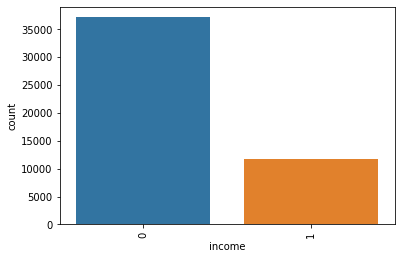

In [ ]:
# Kategorik Değişken Analizi


def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        ax = sns.countplot(x=dataframe[col_name], data=dataframe)
        ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)                
        plt.show(ax)


for col in cat_cols:
    cat_summary(df, col, True)

**Sayısal Değişken Analizi**

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
5%          19.000000
10%         22.000000
20%         26.000000
30%         30.000000
40%         33.000000
50%         37.000000
60%         41.000000
70%         45.000000
80%         51.000000
90%         58.000000
95%         63.000000
99%         74.000000
max         90.000000
Name: age, dtype: float64


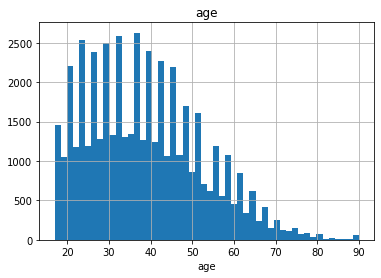

#####################################
count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
5%       3.961540e+04
10%      6.573820e+04
20%      1.060722e+05
30%      1.307140e+05
40%      1.579320e+05
50%      1.781445e+05
60%      1.963080e+05
70%      2.201480e+05
80%      2.602540e+05
90%      3.284660e+05
95%      3.794816e+05
99%      5.094844e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64


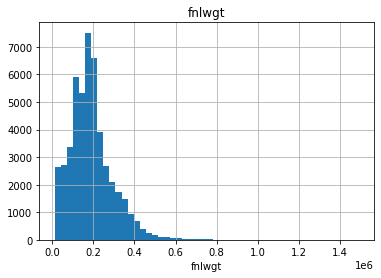

#####################################
count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
5%           5.000000
10%          7.000000
20%          9.000000
30%          9.000000
40%          9.000000
50%         10.000000
60%         10.000000
70%         11.000000
80%         13.000000
90%         13.000000
95%         14.000000
99%         16.000000
max         16.000000
Name: education_num, dtype: float64


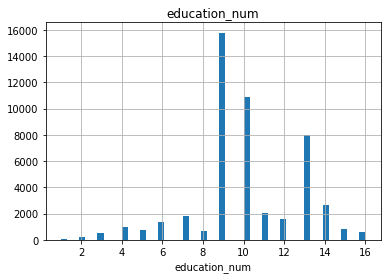

#####################################
count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%       5013.000000
99%      15024.000000
max      99999.000000
Name: capital_gain, dtype: float64


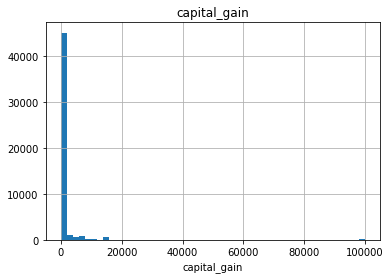

#####################################
count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%       2001.000000
max       4356.000000
Name: capital_loss, dtype: float64


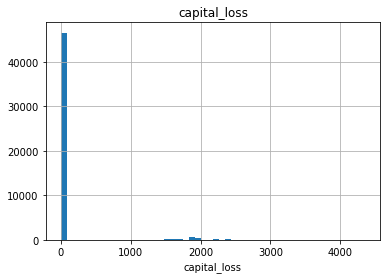

#####################################
count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
5%          17.050000
10%         24.000000
20%         35.000000
30%         40.000000
40%         40.000000
50%         40.000000
60%         40.000000
70%         40.000000
80%         48.000000
90%         55.000000
95%         60.000000
99%         80.000000
max         99.000000
Name: hours_per_week, dtype: float64


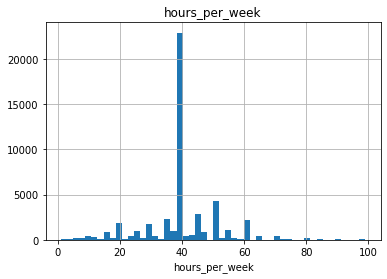

#####################################


In [ ]:
# Sayısal Değişken Analizi


def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")


for col in num_cols:
    num_summary(df, col, True)

**Hedef Değişken Analizi**\
workclass değişkeninde Never-worked sınıfındaki personanın, benzer şekilde new_age_cat değişkeninde young sınıfındaki personanın hedef değişkene hiç bir katkısının olmadığı görülmektedir. Bu sebeple new_age_cat değişkenindeki young sınıfı ve workclass değişkenindeki never_worked sınıfına ait değerler veri setinden silinmiştir.

Geliri 50K' nın üzerinde olanların oranı şirket sahibi serbest meslek erbabında, doktora yapmış olanlarda, eşi sivil evlilerde, yönetici pozisyonunda olanlarda, sarı ırk mensuplarında, erkeklerde, 56 yaş üzerinde, yalnız yaşamayanlarda, Avrupa' lılarda, kamuda çalışanlarda ve Fransız kökenlilerde daha yüksektir.

Geliri 50K' nın üzerinde olanların frekansı özel sektör çalışanlarında, lisans mezunlarında, eşi sivil evlilerde, yönetici pozisyonunda olanlarda, beyaz ırk mensuplarında, erkeklerde, 18 yaş üzeri yetişkinlerde, yalnız yaşamayanlarda, Kuzey Amerika' lılarda, serbest çalışanlarda ve Amerika Birleşik Devletleri kökenlilerde daha yüksektir.


In [ ]:
# Hedef Değişken Analizi


def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(), \
                        "TARGET_FREQUENCY": dataframe.groupby(categorical_col)[target].sum()}), end="\n\n")


for col in cat_cols:
    target_summary_with_cat(df,"income",col)

                  TARGET_MEAN  TARGET_FREQUENCY
workclass                                      
Federal-gov          0.391760               561
Local-gov            0.295599               927
Never-worked         0.000000                 0
Private              0.217867              7387
Self-emp-inc         0.553392               938
Self-emp-not-inc     0.278871              1077
State-gov            0.267542               530
Without-pay          0.095238                 2

                        TARGET_MEAN  TARGET_FREQUENCY
marital_status                                       
 Divorced                  0.101161               671
 Married-AF-spouse         0.378378                14
 Married-civ-spouse        0.446133              9984
 Married-spouse-absent     0.092357                58
 Never-married             0.045480               733
 Separated                 0.064706                99
 Widowed                   0.084321               128

                   TARGET_MEAN  

In [ ]:
# Hedef Değişken Üzerinde Etkisi Olmayan Değerlerin Silinmesi
df = df.drop(df.loc[df["workclass"].str.strip() == "Never-worked"].index)
df = df.drop(df.loc[df["new_age_cat"] == "young"].index)
df = df.drop(df.loc[df["native_country"] == "Holand-Netherlands"].index)

**Korelasyon Analizi**\
Korelasyon analizi neticesinde sayısal değişkenler arasında pozitif veya negatif korelasyona sahip herhangi bir değişken tespit edilmemiştir.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


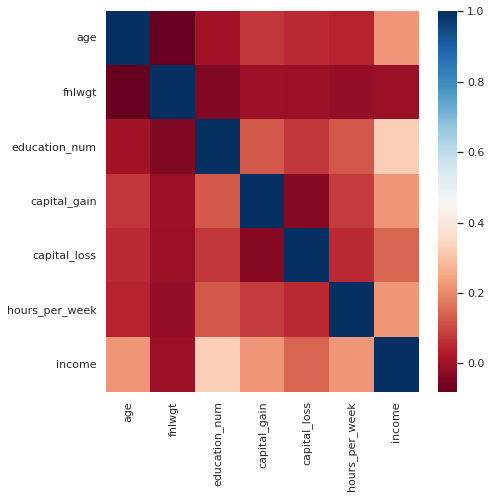

[]


In [ ]:
# Korelasyon Analizi


def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        sns.set(rc={'figure.figsize': (7, 7)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()        
    return drop_list


drop_list = high_correlated_cols(df, True)
print(drop_list)

**Aykırı Değer Analizi**\
Sayısal değişkenlerde herhangi bir aykırı değer tespit edilmemiştir.

In [ ]:
# Aykırı Değer Analizi


def outlier_thresholds(dataframe, variable, low_quantile=0.01, up_quantile=0.99):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    if col != "income":
      print(col, check_outlier(df, col))

age False
fnlwgt True
education_num False
capital_gain True
capital_loss False
hours_per_week False


**Aykırı Değerlerin Baskılanması**\
fnlwgt Amerika Birleşik Devletleri' nde benzer sosyo-ekonomik özelliklere sahip her bir personanın toplam eleman sayısını vermekte olup veri setinden daha büyük bir anakitlenin özelliklerini barındırdığı için aykırı değer baskılama işlemi tercih edilmemiştir.

capital_gain ve capital_loss değişkenindeki aykırı değerlerin baskılanması tercih edilmiştir.

In [ ]:
# Aykırı Değerlerin Baskılanması


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


replace_with_thresholds(df, "capital_gain")

for col in num_cols:
    if col != "income":
      print(col, check_outlier(df, col))

age False
fnlwgt True
education_num False
capital_gain False
capital_loss False
hours_per_week False


**Eksik Değer Analizi**\
Veri setinde workclass, occupation ve native_country değişkenlerinde eksik değerler olduğu tespit edilmiştir. Bu sebeple eksik değerlerin hedef değişkenle analizi gerçekleştirilmiştir.

In [ ]:
# Eksik Değer Analizi


def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns


missing_values_table(df, True)

                n_miss  ratio
workclass         2702   5.60
occupation        2702   5.60
native_country     854   1.77


['workclass', 'occupation', 'native_country']

**Eksik Değerlerin Bağımlı Değişken ile Analizi**\
Eksik değerlerin hedef değişkeni ile analizi neticesinde workclass ve occupation değişkeninde eksik değere sahip olan personaların gelirinin 50K' dan büyük olma olasılığı % 6 civarında olduğu, benzer şekilde native_country değişkeninde eksik değere sahip olan personaların gelirinin 50K' dan büyük olma olasılığının ise % 2 civarında olduğu tespit edilmiştir. Bu sebeple söz konusu değişkenlerde eksik değere sahip olup olmama üzerinden yeni değişkenler türetilmiştir.

In [ ]:
na_cols = missing_values_table(df, True)


def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy() 

    for col in na_columns: 
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0) 

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns 

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n")
        
    return temp_df    

df = missing_vs_target(df, "income", na_cols)

                n_miss  ratio
workclass         2702   5.60
occupation        2702   5.60
native_country     854   1.77
                   TARGET_MEAN  Count
workclass_NA_FLAG                    
0                     0.250835  45536
1                     0.098075   2702

                    TARGET_MEAN  Count
occupation_NA_FLAG                    
0                      0.250835  45536
1                      0.098075   2702

                        TARGET_MEAN  Count
native_country_NA_FLAG                    
0                          0.242002  47384
1                          0.257611    854



**Değişken Tiplerinin Yeniden Belirlenmesi**

In [ ]:
# Değişken Tiplerinin Yeniden Belirlenmesi
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df, 10 , 50)

Observations: 48238
Variables: 22
cat_cols: 16 ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'first_situation', 'new_age_cat', 'new_is_alone', 'new_continent', 'new_work_class', 'income', 'workclass_NA_FLAG', 'occupation_NA_FLAG', 'native_country_NA_FLAG']
num_cols: 6 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
cat_but_car: 0 []
num_but_cat: 4 ['income', 'workclass_NA_FLAG', 'occupation_NA_FLAG', 'native_country_NA_FLAG']


**Keşifçi Veri Analizinin Yinelenmesi**

In [ ]:
# Keşiçi Veri Analizinin Yinelenmesi
for col in df.columns:
    cat_summary(df, col)

     age     Ratio
36  1348  2.794477
35  1337  2.771674
33  1335  2.767528
23  1328  2.753016
31  1325  2.746797
..   ...       ...
88     6  0.012438
85     5  0.010365
87     3  0.006219
89     2  0.004146
86     1  0.002073

[73 rows x 2 columns]
                  workclass      Ratio
Private               33451  69.345744
Self-emp-not-inc       3853   7.987479
Local-gov              3115   6.457565
State-gov              1979   4.102575
Self-emp-inc           1687   3.497243
Federal-gov            1430   2.964468
Without-pay              21   0.043534
        fnlwgt     Ratio
203488      21  0.043534
190290      19  0.039388
120277      19  0.039388
125892      18  0.037315
126569      18  0.037315
...        ...       ...
202053       1  0.002073
540712       1  0.002073
137698       1  0.002073
50649        1  0.002073
350977       1  0.002073

[28027 rows x 2 columns]
    education_num      Ratio
9           15768  32.687922
10          10870  22.534102
13           8025  16.63

**Rare Analizi**\
Rare analizi neticesinde frekansı, oranı ve hedef değişken açısından ortalaması dikkate alınarak gruplandırılabilecek herhangi bir değer tespit edilmemiştir.

In [ ]:
# Rare Analizi


def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")


rare_analyser(df, "income", cat_cols)

workclass : 7
                  COUNT     RATIO  TARGET_MEAN
Federal-gov        1430  0.029645     0.392308
Local-gov          3115  0.064576     0.297592
Private           33451  0.693457     0.220830
Self-emp-inc       1687  0.034972     0.556017
Self-emp-not-inc   3853  0.079875     0.279522
State-gov          1979  0.041026     0.267812
Without-pay          21  0.000435     0.095238


marital_status : 7
                        COUNT     RATIO  TARGET_MEAN
 Divorced                6632  0.137485     0.101176
 Married-AF-spouse         37  0.000767     0.378378
 Married-civ-spouse     22376  0.463867     0.446192
 Married-spouse-absent    626  0.012977     0.092652
 Never-married          15520  0.321738     0.047229
 Separated               1530  0.031718     0.064706
 Widowed                 1517  0.031448     0.084377


occupation : 14
                   COUNT     RATIO  TARGET_MEAN
Adm-clerical        5572  0.115511     0.137832
Armed-Forces          15  0.000311     0.333333
Cra

**Label Encoding**

In [ ]:
# Label Encoding


def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

**One Hot Encoding**

In [ ]:
# One Hot Encoding


def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


df = one_hot_encoder(df, cat_cols)

**Kullanışsız Değişkenler**\
Hedef değişken üzerinde etkisi % 0,1' in altında olan değişkenler veri setinden silinmiştir. 

In [ ]:
# Kullanışsız Değişkenler
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and (df[col].value_counts() / len(df) < 0.001).any(axis=None)]
print(useless_cols)
df.drop(useless_cols, axis=1, inplace=True)

['workclass_Without-pay', 'marital_status_ Married-AF-spouse', 'occupation_Armed-Forces', 'native_country_Ecuador', 'native_country_France', 'native_country_Honduras', 'native_country_Hong', 'native_country_Hungary', 'native_country_Ireland', 'native_country_Laos', 'native_country_Outlying-US(Guam-USVI-etc)', 'native_country_Peru', 'native_country_Scotland', 'native_country_Thailand', 'native_country_Trinadad&Tobago', 'native_country_Yugoslavia', 'new_work_class_Ucretsiz']


**Standard Scaling**

In [ ]:
# Standard Scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

**Veri Setinin Train ve Test Olarak Bölünmesi**

In [ ]:
# Veri Setinin Train ve Test Olarak Bölünmesi
df_train = df.loc[df["first_situation_1"]==1]
df_test = df.loc[df["first_situation_1"]==0]
train_y = df_train["income_1"]
train_X = df_train.drop(["income_1"], axis=1)
test_y = df_test["income_1"]
test_X = df_test.drop(["income_1"], axis=1)

**Model**

In [ ]:
# Model


classifiers = [('LR', LogisticRegression()),
               ('KNN', KNeighborsClassifier()),
               ("SVC", SVC()),
               ("CART", DecisionTreeClassifier()),
               ("RF", RandomForestClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
               ('LightGBM', LGBMClassifier()),
               ('CatBoost', CatBoostClassifier(verbose=False))
               ]

for name, classifier in classifiers:
    cv_results = cross_validate(classifier, train_X, train_y, cv=3, scoring=["roc_auc","accuracy"])
    print("roc_auc : ", f" {round(cv_results['test_roc_auc'].mean(), 4)} ({name})")
    print("acc     : ", f" {round(cv_results['test_accuracy'].mean(), 4)} ({name})")
    print("***********")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


roc_auc :   0.9067 (LR)
acc     :   0.8514 (LR)
***********
roc_auc :   0.8648 (KNN)
acc     :   0.8375 (KNN)
***********
roc_auc :   0.9009 (SVC)
acc     :   0.8552 (SVC)
***********
roc_auc :   0.7473 (CART)
acc     :   0.81 (CART)
***********
roc_auc :   0.9045 (RF)
acc     :   0.8548 (RF)
***********
roc_auc :   0.9207 (GBM)
acc     :   0.8648 (GBM)
***********
roc_auc :   0.9191 (XGBoost)
acc     :   0.8626 (XGBoost)
***********
roc_auc :   0.9256 (LightGBM)
acc     :   0.869 (LightGBM)
***********
roc_auc :   0.9272 (CatBoost)
acc     :   0.8692 (CatBoost)
***********


**Hiperparametre Optimizasyonu**

In [ ]:
# Hiperparametre Optimizasyonu
catboost_model = CatBoostClassifier(verbose=False)
catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}
catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(train_X, train_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
# Hiperparametre Optimizasyonu Sonucu Train Veri Setinde Model Başarısı
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_).fit(train_X, train_y)
cv_results = cross_validate(catboost_final, train_X, train_y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print(cv_results['test_roc_auc'].mean())
print(cv_results['test_accuracy'].mean())

0.9270093249169478
0.8711714518683212


In [ ]:
# Hiperparametre Optimizasyonu Sonucu Test Veri Setinde Model Başarısı
cv_results = cross_validate(catboost_final, test_X, test_y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print(cv_results['test_roc_auc'].mean())
print(cv_results['test_accuracy'].mean())

0.9191278084054346
0.8652901124238837


**Confusion Matrix**\
train veri setinde geliri 50K' dan büyük olmayan 23.278 kişi doğru, test veri setinde ise 11.506 kişi doğru tahmin edilmiştir. 

train veri setinde geliri 50K' dan büyük olan 5.633 kişi doğru, test veri setinde ise 2.507 kişi doğru tahmin edilmiştir.

train veri setinde geliri 50K' dan büyük olmayan 1.040 kişinin geliri 50K' dan büyük olarak, test veri setinde geliri 50K' dan büyük olmayan 727 kişinin geliri 50K' dan büyük olarak tahmin edilmiştir. 

train veri setinde geliri 50K' dan büyük olan 2.208 kişinin geliri 50K' dan küçük olarak, test veri setinde geliri 50K' dan büyük olan 1.339 kişinin geliri 50K' dan küçük olarak tahmin edilmiştir. 

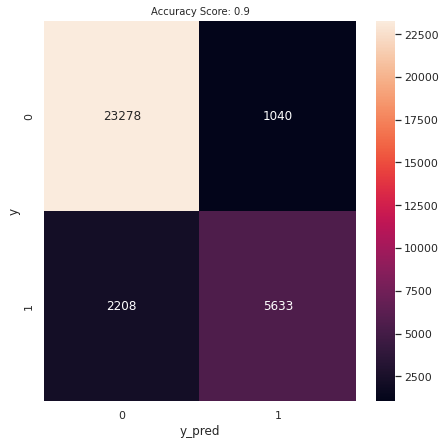

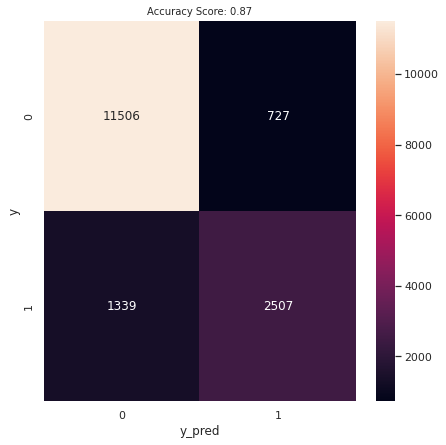

In [ ]:
# Confusion Matrix
train_pred = catboost_final.predict(train_X)
test_pred = catboost_final.predict(test_X)


def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(train_y, train_pred)
plot_confusion_matrix(test_y, test_pred)

**ROC Curve**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


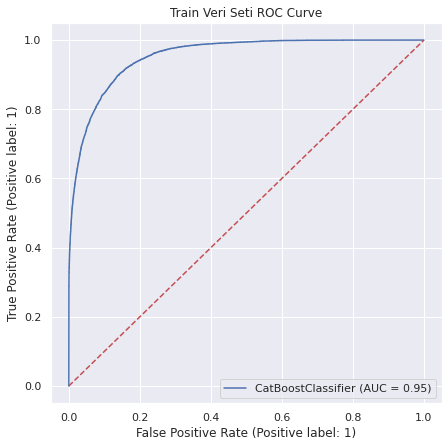

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


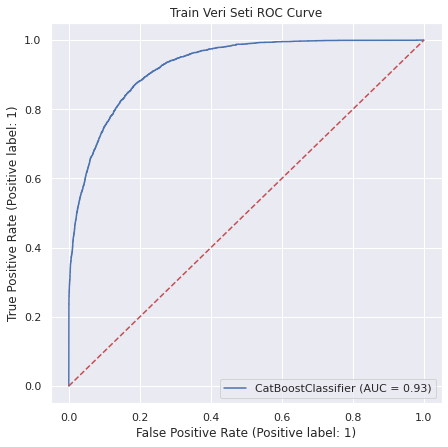

In [ ]:
# ROC Curve
plot_roc_curve(catboost_final, train_X, train_y)
plt.title('Train Veri Seti ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

plot_roc_curve(catboost_final, test_X, test_y)
plt.title('Train Veri Seti ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

**# Feature Importance**\
Hedef değişkene en çok etki eden değişkenlerin sivil eşe sahip olup olmama, yaş, eğitim süresi ve haftalık çalışma süresi olduğu görülmüştür.

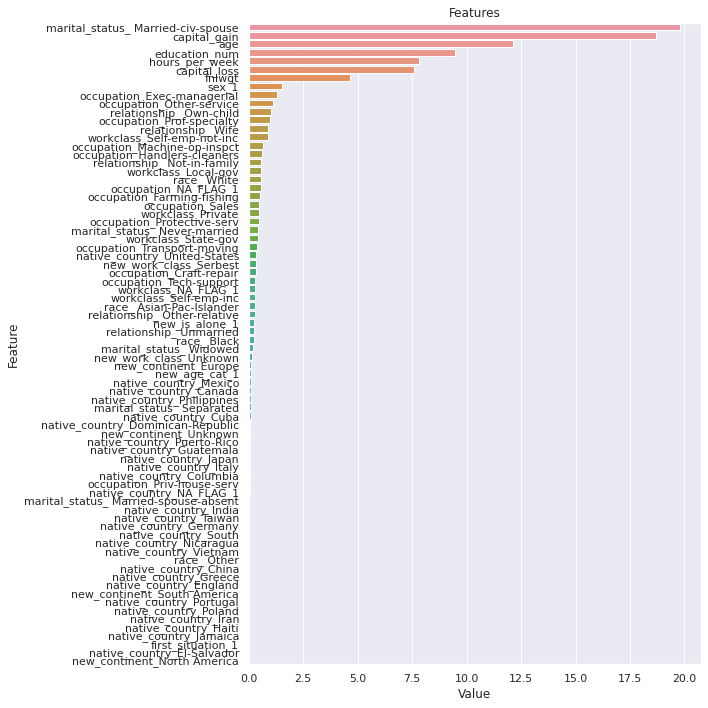

In [ ]:
# Feature Importance


def plot_importance(model, features, num=len(test_X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(catboost_final, test_X)

**Öğrenme Eğrileriyle Model Karmaşıklığının İncelenmesi**

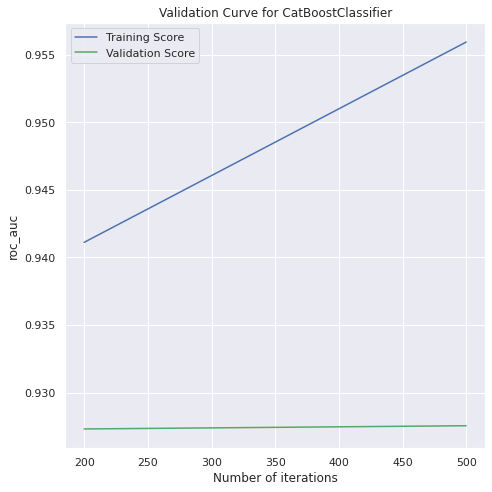

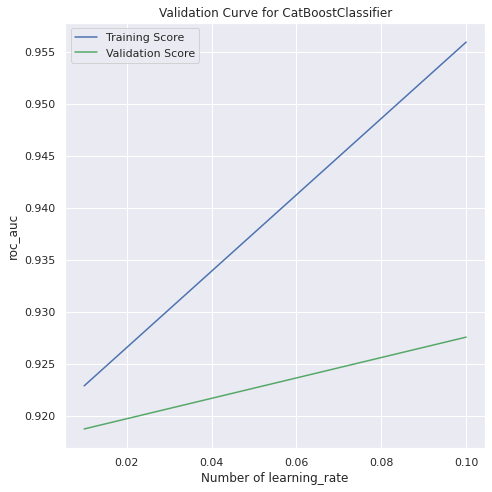

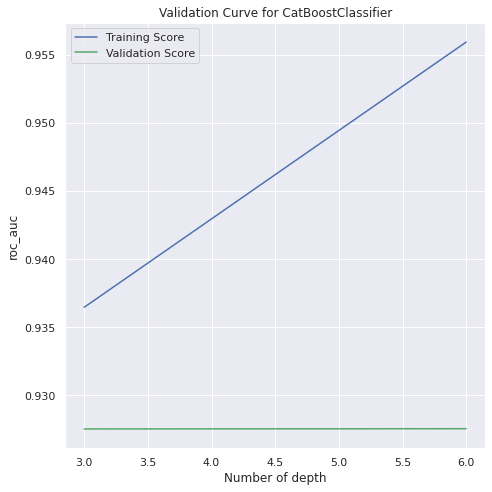

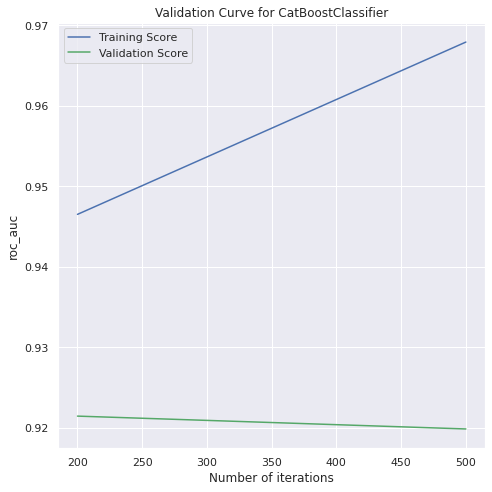

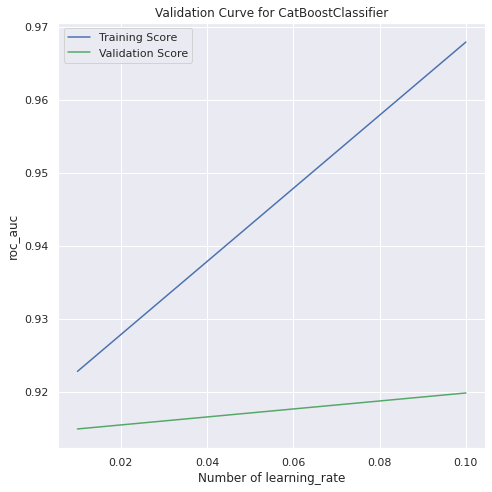

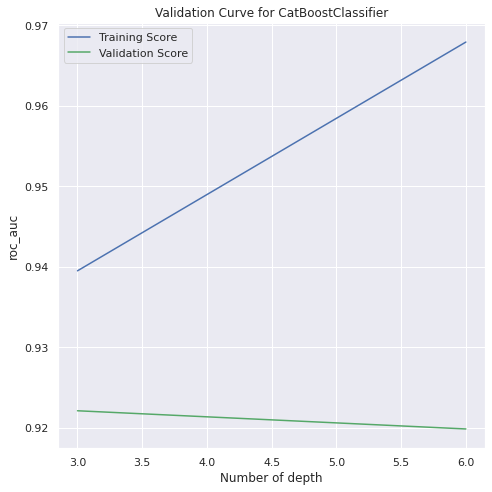

In [ ]:
# Öğrenme Eğrileriyle Model Karmaşıklığının İncelenmesi


def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)


cat_boost_params = [["iterations", [200, 500]],
                   ["learning_rate", [0.01, 0.1]],
                   ["depth", [3, 6]]]

for i in range(len(cat_boost_params)):
    val_curve_params(catboost_final, train_X, train_y, cat_boost_params[i][0], cat_boost_params[i][1])

for i in range(len(cat_boost_params)):
    val_curve_params(catboost_final, test_X, test_y, cat_boost_params[i][0], cat_boost_params[i][1])

**Sonuç ve Değerlendirme**\
Amerika Birleşik Devletleri' nin 1994 Nüfus Sayım Sonuçları' na ait veri seti üzerinden gerçekleştirilen gelir tahmini çalışmasında % 92' lik başarıyla demografik bilgileri verilen bir personanın gelir düzeyinin 50K' dan büyük olup olmadığı tahmin edilmiştir. 

Model çalışmasında türetilen özelliklerinin modele etkisinin kayda değer olmadığı görülmüş olup gelir düzeyinin 50K' dan büyük olmasına etki eden en önemli değişkenlerin sivil bir eşle evli olma, yaş, eğitim durumu, haftalık çalışma süresi ve erkek olma olduğu görülmüştür.